In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import math
from numpy import linalg as la

In [2]:
x = pd.read_csv('C:\\Users\himab\Documents\spring2020\ML\hw2\hw2-data\Bayes_classifier\X.csv', header = None)
y = pd.read_csv('C:\\Users\himab\Documents\spring2020\ML\hw2\hw2-data\Bayes_classifier\Y.csv', header = None)

In [3]:
# # Select only the numeric columns from the NBA dataset
# nba_numeric = nba[distance_columns]
# # Normalize all of the numeric columns
# nba_normalized = (nba_numeric - nba_numeric.mean()) / nba_numeric.std()

In [4]:
#standardize data before using
for i in range(len(x.columns)):
    x[i] = (x[i] - x[i].mean())/x[i].std()

In [5]:
#train test splitting
x = np.array(x)
y = np.array(y)
X_train = {}
X_test = {}
y_train = {}
y_test = {}
i = 0
for train_index, test_index in KFold(n_splits=10, shuffle = True, random_state = 5).split(x):
    X_train[i], X_test[i] = x[train_index], x[test_index]
    y_train[i], y_test[i] = y[train_index], y[test_index]
    i += 1

In [6]:
accuracy = {}
for k in range(1,21):
        accuracy[k] = 0
for index in range(len(X_train)):
    for i in range(len(X_test[index])):
        distance = []
        for j in range(len(X_train[index])):
            d = np.sum(np.abs(X_train[index][j] - X_test[index][i]))
            distance.append(d)
        for k in range(1,21): 
            first_k = np.argsort(distance)[:k]
            train = list(y_train[index][first_k])
            n0 = train.count(0)
            n1 = train.count(1)
            if(n0<= n1):
                output = 1
            else:
                output = 0
            if(output == y_test[index][i]):
                accuracy[k] += 1
            
        

In [7]:
accuracy

{1: 4200,
 2: 4116,
 3: 4176,
 4: 4184,
 5: 4214,
 6: 4212,
 7: 4189,
 8: 4206,
 9: 4190,
 10: 4212,
 11: 4178,
 12: 4201,
 13: 4171,
 14: 4196,
 15: 4165,
 16: 4186,
 17: 4160,
 18: 4175,
 19: 4153,
 20: 4168}

In [8]:
for i in range(1,21):
    accuracy[i] = accuracy[i]/4600
accuracy

{1: 0.9130434782608695,
 2: 0.8947826086956522,
 3: 0.9078260869565218,
 4: 0.9095652173913044,
 5: 0.9160869565217391,
 6: 0.9156521739130434,
 7: 0.9106521739130434,
 8: 0.9143478260869565,
 9: 0.9108695652173913,
 10: 0.9156521739130434,
 11: 0.9082608695652173,
 12: 0.9132608695652173,
 13: 0.9067391304347826,
 14: 0.9121739130434783,
 15: 0.9054347826086957,
 16: 0.91,
 17: 0.9043478260869565,
 18: 0.907608695652174,
 19: 0.9028260869565218,
 20: 0.9060869565217391}

In [9]:
l = []
for key, value in accuracy.items():
    temp = [key,value]
    l.append(value)

In [10]:
l_pd = pd.DataFrame(l)
l_pd.max()

0    0.916087
dtype: float64

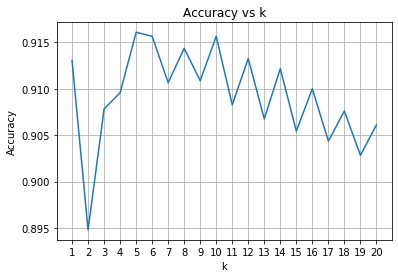

In [11]:
import matplotlib.pyplot as plt
plt.plot(l_pd.index.values + 1,l_pd[0])
plt.xticks(np.arange(min(l_pd.index.values + 1), max(l_pd.index.values + 1)+1, 1.0))
plt.grid()
plt.title('Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()